# Setup

## Modules

In [429]:
import HTfunctions as ht
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import trend

## Data

In [430]:
ost = ht.openDict("Data/ostlandet_final.pkl")
file = ht.findFiles("*Mag*_streamflow*ost*10d*1983*","Results/Daily")[0]
print(file)
trendArray = np.load(file)
catchments = ht.openDict("Data/finalSelectionList.pkl")["ost"]["1983-2012"]

Results/Daily/trendMagnitudes_streamflow_ost_10dMA_1983_2012.npy


In [431]:
num = 32
start = 2000
end = 2004
c = catchments[num]
runoff = ost["data"][c]["runoff"].runoff
ts = runoff[f"{start}":f"{end}"]
ma = runoff.rolling(10,center=True).mean()[f"{start}":f"{end}"]
tr = trendArray[num,:]

# Subplots

## Original time series

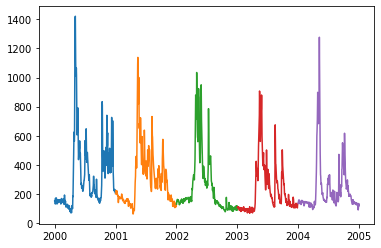

In [432]:
for i in range(start,end+1):
    plt.plot(ts[f"{i}"])

## MA filtered time series

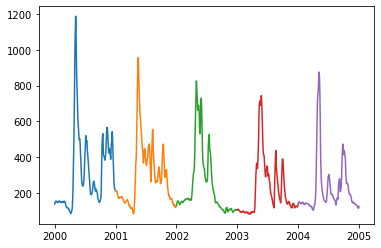

In [433]:
for i in range(start,end+1):
    plt.plot(ma[f"{i}"])

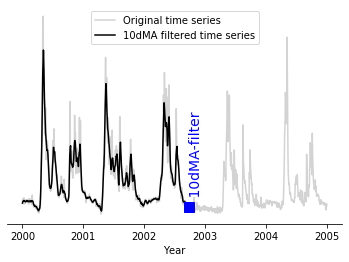

In [434]:
split=1000
fig,ax=plt.subplots()
plt.plot(ts,color="lightgrey",label="Original time series")
plt.plot(ma.iloc[:split],color="k",label="10dMA filtered time series")
plt.plot(ma.index[split],ma.iloc[split],"sb",markersize=10)
plt.text(ma.index[split],ma.iloc[split],"   10dMA-filter",rotation=90,color="b",fontsize=14)
plt.xlabel("Year")
#plt.ylabel("Streamflow in $m^3\ s^{-1}$")
plt.legend()

#plt.axis("off")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([],[])

plt.savefig("Plots/Flowchart/MAfilter.png",dpi=500,bbox_inches="tight")

## Extracting DOY time series

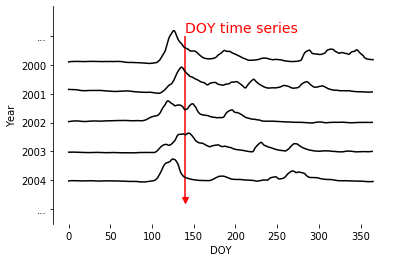

In [435]:
doy = 140
r = np.arange(start,end+1)
fig,ax = plt.subplots()
p = []
for i,y in enumerate(r):
    a = np.array(ma[f"{y}"])
    #ax[i].plot(a)
    #ax[i].plot(doy,a[doy],"rx")
    p.append(a[doy])
    plt.plot(a-1000*i,"k")
plt.vlines(doy,1000,-4500,"r")
plt.plot(doy,-4500,"rv")
plt.text(doy,1150,"DOY time series",color="r",fontsize=14)
plt.xlabel("DOY")
yt = ["..."]+list(np.arange(start,end+1))+["..."]
plt.yticks(np.linspace(1000,-4800,7),yt)
#plt.yticks([1500,-4500],["...","..."])
plt.ylabel("Year")
plt.ylim(-5300,2000)
#plt.axis("off")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.savefig("Plots/Flowchart/DOYtimeseries.png",dpi=500,bbox_inches="tight")

## Estimating trend magnitude

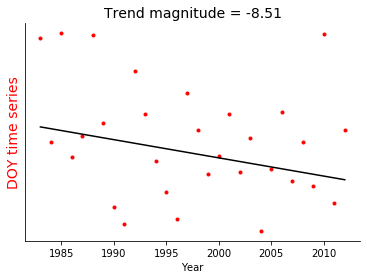

In [436]:
start = 1983
end = 2012
long = runoff.rolling(10,center=True).mean()[f"{start}":f"{end}"]
r = np.arange(start,end+1)
doyTS = []
for i,y in enumerate(r):
    a = np.array(long[f"{y}"])
    doyTS.append(a[doy])
doyTS = np.array(doyTS)

m = trend.sen_slope(doyTS)
b = np.median(doyTS - m*r)
l = m*r+b

fig,ax = plt.subplots()
plt.plot(r,doyTS,"r.")
plt.plot([r[0],r[-1]],[l[0],l[-1]],"k")
plt.title(f"Trend magnitude = {m:.2f}",fontsize=14)
plt.ylabel(f"DOY time series",color="r",fontsize=14)
plt.xlabel("Year")
#plt.ylabel("Streamflow in $m^3\ s^{-1}$")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.yticks([],[])

plt.savefig("Plots/Flowchart/DOYtrend.png",dpi=500,bbox_inches="tight")

## Daily trend catchment

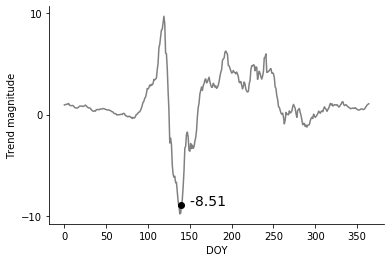

In [443]:
fig,ax = plt.subplots()
plt.plot(tr,"grey")
plt.plot(doy,tr[doy],"ko")
plt.text(doy,tr[doy],f"  {m:.2f}",fontsize=14)
plt.xlabel("DOY")
plt.ylabel("Trend magnitude")
plt.yticks([10,0,-10])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.savefig("Plots/Flowchart/trendCatchment.png",dpi=500,bbox_inches="tight")

## Daily trend region

Results/Daily/trendMagnitudes_PROstreamflow_ost_10dMA_1983_2012.npy


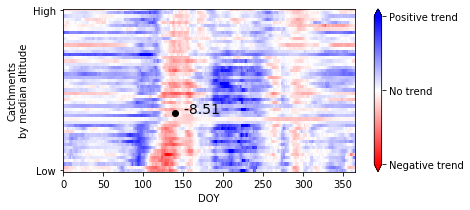

In [449]:
file = ht.findFiles("*Mag*PROstreamflow*ost*10d*1983*","Results/Daily")[0]
print(file)
trendArray = np.load(file)

lim=5
fig, ax = plt.subplots(figsize=(7,3))
cax = ax.imshow(trendArray,aspect=4,cmap="bwr_r",vmin=-lim,vmax=lim)
cbar = fig.colorbar(cax,extend="both",ticks=[lim,0,-lim])
cbar.ax.set_yticklabels(["Positive trend", "No trend", "Negative trend"]) 
#plt.yticks([0,50], ["High","Low"])
plt.yticks([0,50], ["High","Low"])
plt.plot(doy,num,"ok")
plt.text(doy,num,f"  {m:.2f}",fontsize=14)
plt.xlabel("DOY")
plt.ylabel("Catchments\nby median altitude")
plt.savefig("Plots/Flowchart/trendRegion.png",dpi=500,bbox_inches="tight")